In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


df = pd.read_csv(r'./data/positive_quarterly_return_rates.csv', index_col=0, parse_dates=True)

df.head()

,A,AAPL,ABT,ADBE,ADM,ADSK,AFL,AJG,AKAM,ALB,...,WELL,WFC,WHR,WM,WMB,WRB,WST,WY,XEL,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-31 00:00:00+00:00,0.676857,0.086113,-0.065109,-0.014655,-0.010309,0.131356,-0.072538,0.165375,0.476163,-0.028139,...,-0.035294,-0.165333,0.011247,0.077520,-0.059709,-0.052068,-0.131059,0.160955,-0.050191,-0.082949
2000-06-30 00:00:00+00:00,0.361111,0.190954,0.062341,0.610500,-0.121339,0.320888,0.052299,0.037424,-0.629572,0.118803,...,-0.053058,0.122722,-0.033376,-0.183453,0.411607,0.141583,-0.185598,-0.157897,0.039474,-0.187604
2000-09-30 00:00:00+00:00,-0.248087,-0.200187,0.203642,0.211611,-0.042979,-0.180705,0.000413,0.289989,0.062763,0.083392,...,0.207079,-0.063691,-0.145006,0.325991,-0.033879,-0.179779,-0.116106,-0.228496,0.056400,-0.055671
2000-12-31 00:00:00+00:00,-0.313825,-0.545134,0.086607,0.274898,-0.036968,-0.304396,0.396158,0.388079,-0.629355,-0.114696,...,0.108037,0.162893,-0.231521,-0.042656,0.030177,0.841229,0.093125,-0.146347,0.395273,0.076419
2001-03-31 00:00:00+00:00,0.006180,-0.386599,0.007814,-0.426444,0.610100,0.030130,0.065282,0.086665,-0.578667,0.237494,...,-0.054010,0.152052,0.238101,0.500001,-0.116739,0.358921,0.059117,0.334808,0.034543,0.036512


In [2]:
def fit_distributions(stock_returns):
    normal_params = stats.norm.fit(stock_returns)
    t_params = stats.t.fit(stock_returns)
    return normal_params, t_params


fitted_params = {}


for stock in df.columns:
    stock_returns = df[stock]
    normal_params, t_params = fit_distributions(stock_returns)
    fitted_params[stock] = {"normal": normal_params, "t-student": t_params}


fitted_params

{'A': {'normal': (0.0376563770482072, 0.20872902823977427),
  't-student': (4.912957441359179, 0.04086186277436923, 0.16587757790350083)},
 'AAPL': {'normal': (0.08101008438577577, 0.2137727271056131),
  't-student': (12.754555624385702, 0.08347678871526684, 0.1968017766343155)},
 'ABT': {'normal': (0.029136277831471474, 0.09234181124495762),
  't-student': (24.89358418904315, 0.03042411951729119, 0.08849315541602895)},
 'ADBE': {'normal': (0.05479753908900454, 0.18614230350674435),
  't-student': (6.022750016696044, 0.06473401898647597, 0.15444646548604019)},
 'ADM': {'normal': (0.036376009691825445, 0.15231909367203222),
  't-student': (5.579254679977576, 0.026639016626554407, 0.12300811071959769)},
 'ADSK': {'normal': (0.05611574599411264, 0.20384019541229814),
  't-student': (14.78994945082466, 0.054543292821423145, 0.189592520209655)},
 'AFL': {'normal': (0.036805258178758266, 0.15188148726599582),
  't-student': (2.618250520274578, 0.03985270353551214, 0.08695263820851568)},
 'AJ

In [21]:
def truncated_cdf(x, dist_cdf, a, b):
    cdf_a = dist_cdf(a)
    cdf_b = dist_cdf(b)
    return (dist_cdf(x) - cdf_a) / (cdf_b - cdf_a)


def get_truncated_boundaries(stock_returns):
    return stock_returns.min(), stock_returns.max()


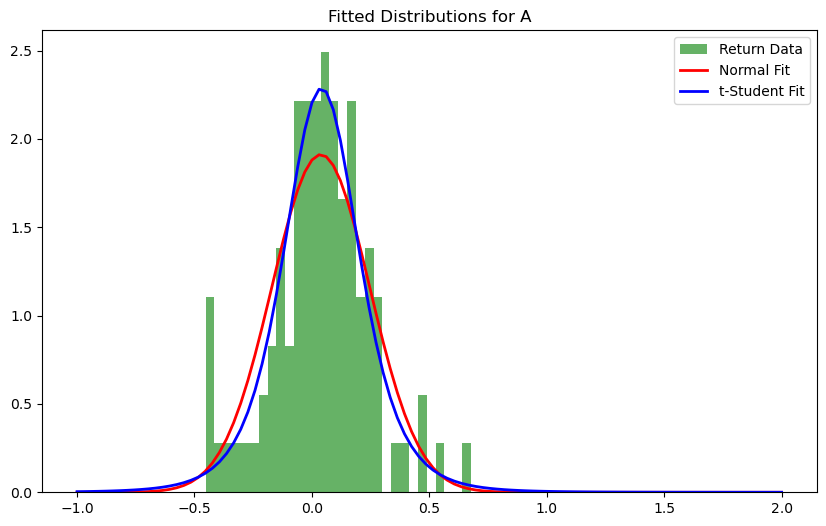

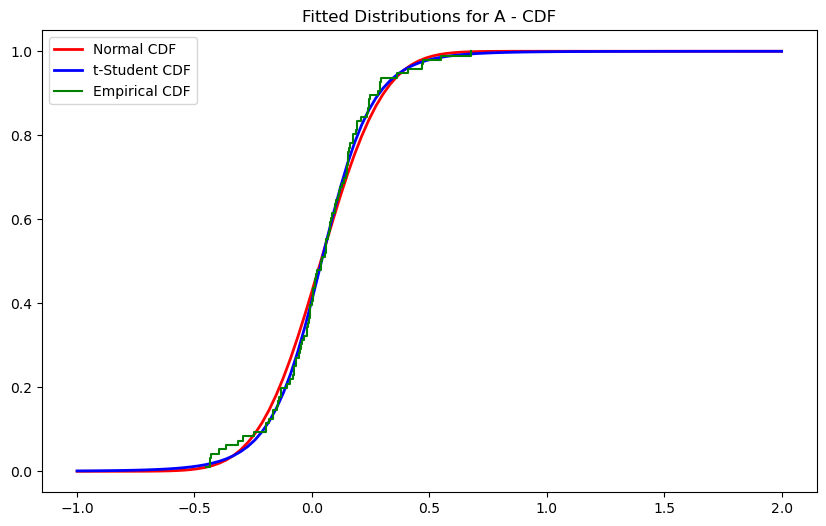

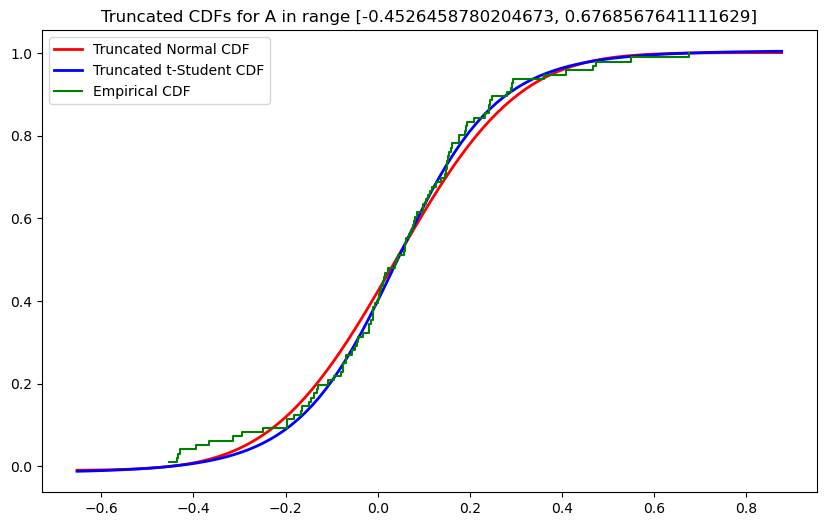

In [25]:

def plot_fitted_distributions(stock, stock_returns, normal_params, t_params):
    plt.figure(figsize=(10, 6))
    plt.hist(stock_returns, bins=30, density=True, alpha=0.6, color='g', label="Return Data")
    x = np.linspace(-1, 2, 100)
    plt.plot(x, stats.norm.pdf(x, *normal_params), 'r-', lw=2, label='Normal Fit')
    plt.plot(x, stats.t.pdf(x, *t_params), 'b-', lw=2, label='t-Student Fit')
    plt.title(f"Fitted Distributions for {stock}")
    plt.legend()
    plt.show()


def plot_fitted_cdfs(stock, stock_returns, normal_params, t_params):
    plt.figure(figsize=(10, 6))
    x = np.linspace(-1, 2, 100)
    plt.plot(x, stats.norm.cdf(x, *normal_params), 'r-', lw=2, label='Normal CDF')
    plt.plot(x, stats.t.cdf(x, *t_params), 'b-', lw=2, label='t-Student CDF')
    sorted_returns = np.sort(stock_returns)
    empirical_cdf = np.arange(1, len(sorted_returns)+1) / len(sorted_returns)
    plt.step(sorted_returns, empirical_cdf, where='post', label='Empirical CDF', color='g')
    plt.title(f"Fitted Distributions for {stock} - CDF")
    plt.legend()
    plt.show()


def plot_truncated_cdfs(stock, stock_returns, normal_params, t_params):
    plt.figure(figsize=(10, 6))

    lower_bound, upper_bound = get_truncated_boundaries(stock_returns)

    x = np.linspace(lower_bound - 0.2, upper_bound + 0.2, 100)
    # Truncated CDF for Normal distribution
    plt.plot(x, truncated_cdf(x, lambda x: stats.norm.cdf(x, *normal_params), lower_bound, upper_bound), 'r-', lw=2, label='Truncated Normal CDF')
    # Truncated CDF for t-Student distribution
    plt.plot(x, truncated_cdf(x, lambda x: stats.t.cdf(x, *t_params), lower_bound, upper_bound), 'b-', lw=2, label='Truncated t-Student CDF')

    # Empirical CDF
    sorted_returns = np.sort(stock_returns)
    empirical_cdf = np.arange(1, len(sorted_returns)+1) / len(sorted_returns)
    plt.step(sorted_returns, empirical_cdf, where='post', label='Empirical CDF', color='g')

    plt.title(f"Truncated CDFs for {stock} in range [{lower_bound}, {upper_bound}]")
    plt.legend()
    plt.show()


for stock in df.columns:
    stock_returns = df[stock]

    normal_params = fitted_params[stock]["normal"]
    t_params = fitted_params[stock]["t-student"]


    plot_fitted_distributions(stock, stock_returns, normal_params, t_params)
    plot_fitted_cdfs(stock, stock_returns, normal_params, t_params)
    plot_truncated_cdfs(stock, stock_returns, normal_params, t_params)
    break

